In [1]:
# import all necessary libraries for computation, data handling, visualization, and models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# load the data from the CSV file into a pandas DataFrame
df = pd.read_csv('column_names_airlines.csv')
print(df.head()) # test opening the file

# calculate and display the correlation coefficient individually between the target and two 
# feature variables based on Hands-on Problem 4.2 (Linear Regression).
print("\nCorrelation coefficient between number of customers and length of flight:", 
      np.corrcoef(df.thousands_of_customers_served, df.flight_length_miles)[0, 1])
print("Correlation coefficient between number of customers and daily flight time per plane:", 
      np.corrcoef(df.thousands_of_customers_served, df.daily_flight_time_per_plane)[0, 1])

# based on correlation coefficients above, it seems that the length of flight has a stronger 
# positive relationship with the number of customers compared to daily flight time per plane.

        Airline  flight_length_miles  speed_mph  daily_flight_time_per_plane  \
0  All American                   57        133                         6.10   
1      American                  270        216                         6.93   
2       Bonanza                  100        140                         4.45   
3       Braniff                  176        182                         6.60   
4       Capital                  142        167                         7.47   

   thousands_of_customers_served  \
0                          20200   
1                          56928   
2                            183   
3                          11869   
4                          41097   

   operating_cost_in_cents_per_revenue_ton-mile  total_assets_in_100000_usd  \
0                                         116.3                        0.96   
1                                          43.0                        3.98   
2                                         141.5                  

In [3]:
# The following few blocks of code use a multiple linear regression model to predict the number
# of customers each airline serves using the length of the flight and daily flight time per place.

y = df['thousands_of_customers_served'] # define the dependent (target) variable
X = df[['flight_length_miles', 'daily_flight_time_per_plane']] # define the independent (feature) variables
X = sm.add_constant(X) # add a constant term to the independent variables 'X'

model = sm.OLS(y, X).fit() # fit a multiple linear regression model using the OLS method
print(model.summary()) # print summary statistics of the fitted multiple linear regression model
print("\nModel Parameters:\n", model.params) # print coefficients of the multiple linear regression model

# Based on the coefficients from above, we can interpret that when flight length is increased, the number 
# of customers also increases (positive relationship). However, when the daily flight time per plane 
# increases, the number of customers will decrease (negative relationship). This means that this model 
# and the correlation coefficients found in the previous code block agree.

                                  OLS Regression Results                                 
Dep. Variable:     thousands_of_customers_served   R-squared:                       0.621
Model:                                       OLS   Adj. R-squared:                  0.594
Method:                            Least Squares   F-statistic:                     22.99
Date:                           Sat, 25 Jan 2025   Prob (F-statistic):           1.24e-06
Time:                                   11:25:30   Log-Likelihood:                -330.07
No. Observations:                             31   AIC:                             666.1
Df Residuals:                                 28   BIC:                             670.4
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----

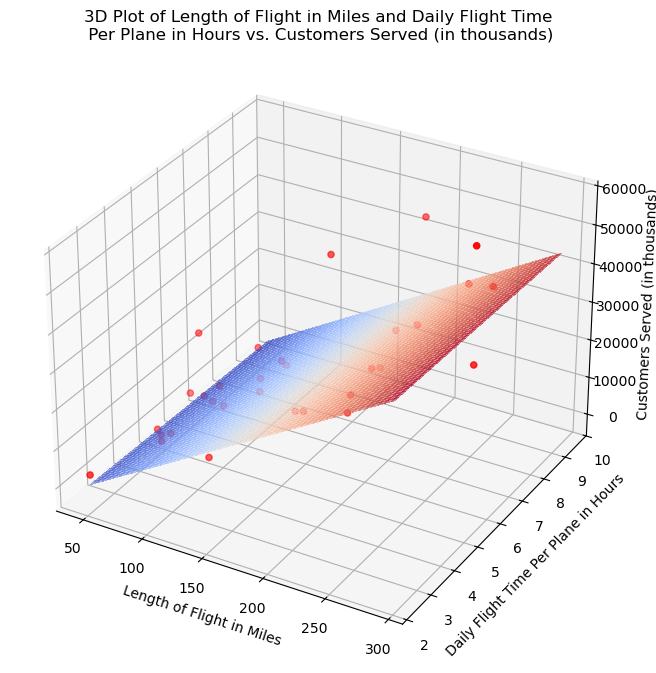

In [4]:
# generate a meshgrid for the 3D plot based on the ranges of feature variables with 100 evenly 
# spaced points with the respective ranges of those variables.
X_axis, Y_axis = np.meshgrid(
    np.linspace(X['flight_length_miles'].min(), X['flight_length_miles'].max(), 100),  
    np.linspace(X['daily_flight_time_per_plane'].min(), X['daily_flight_time_per_plane'].max(), 100)  
)

# calculate the Z-axis values (predicted number of customers) using the regression model's parameters.
Z_axis = (
    model.params.iloc[0]  
    + model.params.iloc[1] * X_axis  
    + model.params.iloc[2] * Y_axis  
)

# initialize a 3D plot
fig = plt.figure(figsize=(12, 8))  
ax = fig.add_subplot(111, projection='3d') 

# plot the surface based on the meshgrid of the three variables
ax.plot_surface(X_axis, Y_axis, Z_axis, cmap='coolwarm', alpha=0.5, linewidth=0, antialiased=False)

# add a scatter plot of the actual data points
ax.scatter(df['flight_length_miles'], df['daily_flight_time_per_plane'], df['thousands_of_customers_served'], color='red')

# label the axes to indicate what each axis represents
ax.set_xlabel('Length of Flight in Miles')
ax.set_ylabel('Daily Flight Time Per Plane in Hours')
ax.set_zlabel('Customers Served (in thousands)')

# add a title to the plot for better understanding.
ax.set_title('3D Plot of Length of Flight in Miles and Daily Flight Time\n Per Plane in Hours vs. Customers Served (in thousands)')

# display the plot
plt.show()

# The interpretation of the 3D plot below agrees with the previous results and interpretations mentioned in 
# the earlier code blocks.

In [8]:
# The following few blocks of code use a linear regression model to predict the total 
# assets of an airline from the customers served by the airline.

# calculate and display correlation coefficient
print("Correlation coefficient between customers served and total assets of an airline:", 
      np.corrcoef(df.thousands_of_customers_served, df.total_assets_in_100000_usd)[0, 1])

# this coefficient of 0.8167009307655939 shows a strong positive relationship.

Correlation coefficient between customers served and total assets of an airline: 0.8167009307655939


In [7]:
y = df['total_assets_in_100000_usd'] # define the dependent (target) variable
X = df['thousands_of_customers_served'] # define the independent (feature) variable
X = sm.add_constant(X) # add a constant term to the independent variable

model = sm.OLS(y, X).fit() # fit an OLS linear regresion model
print(model.summary()) # print a detailed summary of the linear regression model

                                OLS Regression Results                                
Dep. Variable:     total_assets_in_100000_usd   R-squared:                       0.667
Model:                                    OLS   Adj. R-squared:                  0.656
Method:                         Least Squares   F-statistic:                     58.09
Date:                        Sat, 25 Jan 2025   Prob (F-statistic):           2.11e-08
Time:                                11:29:14   Log-Likelihood:                -31.876
No. Observations:                          31   AIC:                             67.75
Df Residuals:                              29   BIC:                             70.62
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

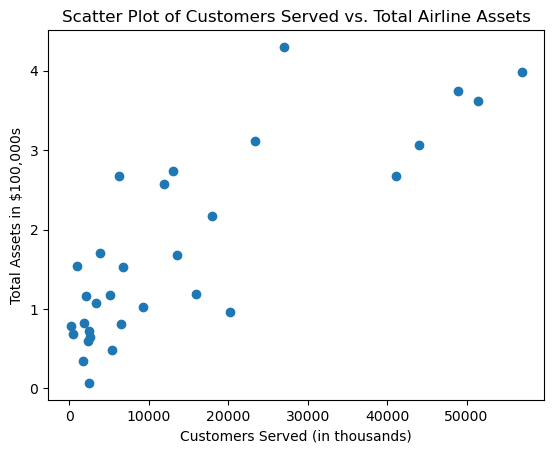

In [12]:
# create a scatter plot to visualize the relationship between customers served
# and total assets of an airline.
plt.scatter(df['thousands_of_customers_served'], df['total_assets_in_100000_usd'])
plt.xlabel('Customers Served (in thousands)')
plt.ylabel('Total Assets in $100,000s')
plt.title('Scatter Plot of Customers Served vs. Total Airline Assets')
plt.show()

In [ ]:
# From the previous blocks of code using a linear regression model to predict the total 
# assets of an airline from the customers served by the airline, a strong positive 
# relationship between them is a certain. The linear regression model shows that as the 
# number of customers increases, the airline's total assets in USD also increases. With
# this, it can be concluded that the relationship between the feature and target 
# variable is indeed significant.